In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman
import statsmodels.formula.api as smf

/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.incremental_pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of 

In [2]:
reload(dlc_utils)
reload(utils_jjm)

<module 'python_utils_jjm' from '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/python_utils_jjm.py'>

In [3]:
#load and prep data
dir_path_cnmfe = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/28-Feb_16_10_05_out.mat'
dir_path_tracking = '/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H13_M42_S33/GRIN033_H13_M42_S33_dlc_tracking_foranalysis_04142020.csv'

In [4]:
C_z_scored, interpolated = utils_jjm.prepare_timedelta_dfs(dir_path_cnmfe, dir_path_tracking)

In [5]:
interpolated.head()

index  miniscope_light  tail_base  ear_right  centroid  \
time(sec)                                                                  
00:00:00         14.050         0.306514   0.145742   0.286106  0.172292   
00:00:00.050000  15.555         0.301079   0.147939   0.282746  0.169670   
00:00:00.100000  17.060         0.295645   0.150135   0.279386  0.167049   
00:00:00.150000  18.565         0.290211   0.152331   0.276026  0.164428   
00:00:00.200000  20.070         0.284777   0.154527   0.272667  0.161806   

                 ear_left  miniscope_light_likelihood  tail_base_likelihood  \
time(sec)                                                                     
00:00:00         0.316915                         1.0                   1.0   
00:00:00.050000  0.309812                         1.0                   1.0   
00:00:00.100000  0.302709                         1.0                   1.0   
00:00:00.150000  0.295606                         1.0                   1.0   
00:00:00.200000  0.288503                         1.0                   1.0   

                 ear_right_likelihood  centroid_likelihood  \
time(sec)                                                    
00:00:00                          1.0                  1.0   
00:00:00.050000                   1.0                  1.0   
00:00:00.100000                   1.0                  1.0   
00:00:00.150000                   1.0                  1.0   
00:00:00.200000                   1.0                  1.0   

                 ear_left_likelihood  msCam_index  
time(sec)                                          
00:00:00                         1.0          0.0  
00:00:00.050000                  1.0          1.0  
00:00:00.100000                  1.0          2.0  
00:00:00.150000                  1.0          3.0  
00:00:00.200000                  1.0          4.0

In [10]:
pd.cut(interpolated['tail_base'].values, 50)

[(0.0439, 1.188], (0.0439, 1.188], (0.0439, 1.188], (0.0439, 1.188], (0.0439, 1.188], ..., (0.0439, 1.188], (0.0439, 1.188], (0.0439, 1.188], (0.0439, 1.188], (0.0439, 1.188]]
Length: 29341
Categories (50, interval[float64]): [(0.0439, 1.188] < (1.188, 2.278] < (2.278, 3.369] < (3.369, 4.459] ... (50.24, 51.33] < (51.33, 52.42] < (52.42, 53.51] < (53.51, 54.6]]

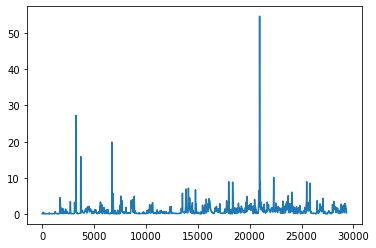

In [8]:
# plotting individual cell fluorescence 
plt.plot(interpolated['tail_base'].values[0:])
plt.show()

In [106]:
## inputs are downsampling interval, number of bins, body part to use for velocity correlation, velocity dataframe, fluorescence dataframe 
cells_C_binned_by_V, cells_mean_C_binned_by_V = dlc_utils.downsample_session_and_bin_C_by_V(1, 50, 'centroid', interpolated, C_z_scored)

/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [107]:
regression_results = dlc_utils.create_regression_models_per_cell(cells_mean_C_binned_by_V, 2)

In [112]:
regression_results[1]['statsmodel_results'].summary()

/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     5.412
Date:                Thu, 16 Apr 2020   Prob (F-statistic):             0.0326
Time:                        16:57:40   Log-Likelihood:                -11.929
No. Observations:                  19   AIC:                             27.86
Df Residuals:                      17   BIC:                             29.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.592e-17      0.171   3.84e-16      1.000      -0.362       0.362
model(x)       1.0000      0.430      2.326      0.033       0.093       1.907
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.489
Skew:                          -0.310   Prob(JB):                        0.783
Kurtosis:                       2.517   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
print(regression_results[cell]['statsmodel_results'].summary().tables[0][0][3].data)

   0.305


  Prob (F-statistic):
0.0142


/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


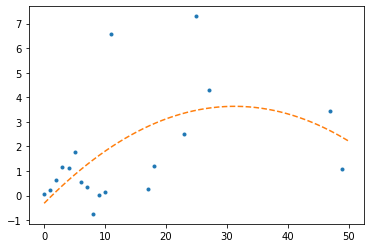

In [108]:
cell=4
#label
print(regression_results[cell]['statsmodel_results'].summary().tables[0][3][2].data)
#F-stat
print(regression_results[cell]['statsmodel_results'].summary().tables[0][3][3].data)
xp, p1d = dlc_utils.plot_cell_regression(regression_results, cell, cells_mean_C_binned_by_V)
fig = plt.plot(regression_results[cell]['fit_df']['x'].values, regression_results[cell]['fit_df']['y'].values, '.',
              xp, p1d(xp), '--')


In [109]:
F_stats = np.array([float(regression_results[cell]['statsmodel_results'].summary().tables[0][3][3].data) for cell in range(1, len(regression_results)+1)])

/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [110]:
# to determine cells with significant quadratic regressions
len(np.argwhere(F_stats<0.05))

43

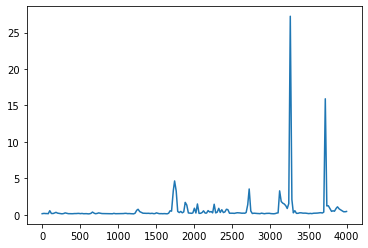

In [111]:
## plot downsampled velocity 
# plotting "interpolated velocity"
interpolated_indicies=(0,4000)
plt.plot(interpolated['msCam_index'][interpolated_indicies[0]:interpolated_indicies[1]], interpolated['tail_base'][interpolated_indicies[0]:interpolated_indicies[1]])
plt.show()

# downsample velocity and pick maximum values within 200msec 
new_sampling_interval = 2
interpolated = interpolated.set_index(pd.to_timedelta(np.linspace(0, len(interpolated)*(1/20), len(interpolated)), unit='s'), drop=True)
interpolated_downsampled = interpolated.resample(str(new_sampling_interval)+'S').max()


In [ ]:
binned_velocity = dlc_utils.bin_by_activity_threshold(interpolated['tail_base'], 40, 20, 0.5, 0.5)

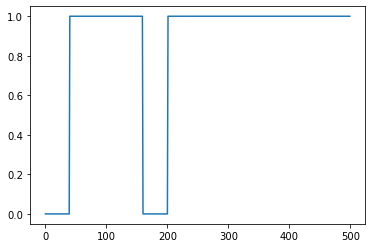

In [54]:
plt.plot(binned_velocity[indicies[0]:indicies[1]])

In [55]:
#return inidicies where velocity transitions from at least a 1 second resting period 
transition_indicies = []
resting_threshold = 40
for point in range(resting_threshold, len(binned_velocity)):
    if binned_velocity[point]>0.5 and not any(binned_velocity[point-resting_threshold:point]):
           transition_indicies.append(point)

In [51]:
#select section of trace 2 seconds around transition periods
transition_activity = {}
for index in transition_indicies:
       transition_activity[index] = C_z_scored.mean(axis=0)[index-40:index+40]
threshold_activity_df = pd.DataFrame(transition_activity)

ValueError: arrays must all be same length

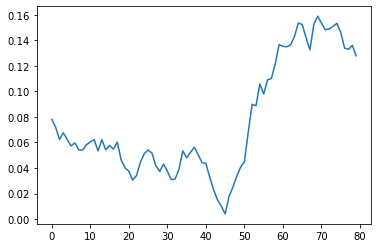

In [111]:
plt.plot(threshold_activity_df.mean(axis=1))
plt.show()

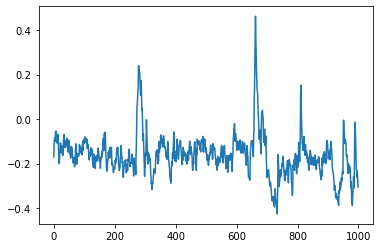

In [88]:
plt.plot(C_z_scored.mean(axis=0)[indicies[0]:indicies[1]])

In [90]:
#return indicies where value is above threshold
moving_indicies = np.argwhere(binned_velocity>0.5)
#compare df/f for moving and nonmoving periods 
df_f_moving = np.mean(C_z_scored.mean(axis=0)[moving_indicies])
df_f_resting = np.mean(C_z_scored.mean(axis=0)[np.argwhere(binned_velocity[0:25000]<0.5)])

In [92]:
np.mean(C_z_scored.mean(axis=0)[moving_indicies])

0.19100929066490835

In [94]:
np.mean(C_z_scored.mean(axis=0)[np.argwhere(binned_velocity[0:25000]<0.5)])

-0.09380713940921243